<a href="https://colab.research.google.com/github/sathwika-0717/-Text-Classification-with-LSTM-IMDB-Sentiment-Analysis-Project-/blob/main/sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow version: 2.18.0
⚠️ Google Drive mount or directory change failed: Error: credential propagation was unsuccessful
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: (32000, 300), Valid: (8000, 300), Test: (10000, 300)
Categories: [0 1]
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Review: <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> the only possible way to enjoy this flick is to bang your head against the wall allow some internal <UNK> of the brain let a bunch of your brain cells die and once you are officially mentally retarded perhaps then you might enjoy this film br br the only s

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.7617 - loss: 0.4508

500/500 ━━━━━━━━━━━━━━━━━━━━ 219s 432ms/step - accuracy: 0.7618 - loss: 0.4505 - val_accuracy: 0.8846 - val_loss: 0.2764
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 270s 448ms/step - accuracy: 0.9197 - loss: 0.2058 - val_accuracy: 0.8895 - val_loss: 0.2808
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 259s 442ms/step - accuracy: 0.9479 - loss: 0.1382 - val_accuracy: 0.8839 - val_loss: 0.3302
313/313 - 17s - 56ms/step - accuracy: 0.8839 - loss: 0.3265
Test Loss: 0.32646408677101135
Test Accuracy: 0.883899986743927
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4912
           1       0.87      0.91      0.89      5088

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



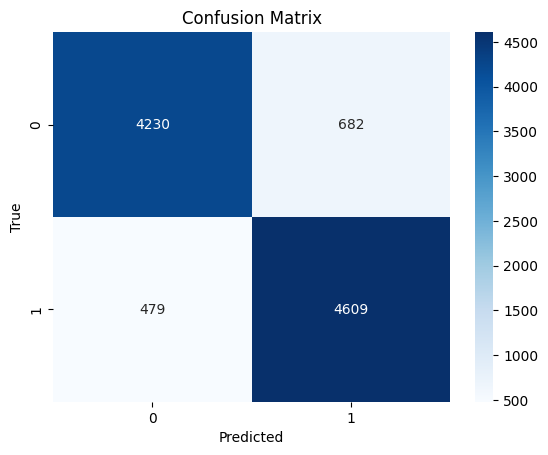

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

try:
    from google.colab import drive
    drive.mount("/content/drive", force_remount=True)

    import os
    os.chdir('/content/drive/MyDrive/AIML/Projects/NLP/Sentiment Analysis')
    print("Changed to working directory:", os.getcwd())
except Exception as e:
    print("⚠️ Google Drive mount or directory change failed:", e)

import warnings
warnings.filterwarnings('ignore')

tf.random.set_seed(42)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

max_len = 300
X_train = pad_sequences(X_train, maxlen=max_len, padding='pre')
X_test = pad_sequences(X_test, maxlen=max_len, padding='pre')

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)

print(f'Train: {X_train.shape}, Valid: {X_valid.shape}, Test: {X_test.shape}')
print(f'Categories: {np.unique(y_train)}')

def decode_review(x, y):
    w2i = imdb.get_word_index()
    w2i = {k: (v + 3) for k, v in w2i.items()}
    w2i['<PAD>'] = 0
    w2i['<START>'] = 1
    w2i['<UNK>'] = 2
    i2w = {i: w for w, i in w2i.items()}
    print("Review:", ' '.join(i2w.get(i, '?') for i in x))
    print("Sentiment:", y)
    return w2i, i2w

w2i, i2w = decode_review(X_train[0], y_train[0])

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

callbacks = [
    EarlyStopping(monitor='val_loss', patience=2),
    ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
]

history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_valid, y_valid), callbacks=callbacks)

results = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()